In [2]:
from fastai.vision.all import *

pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

dls = pets.dataloaders(untar_data(URLs.PETS)/"images")


/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


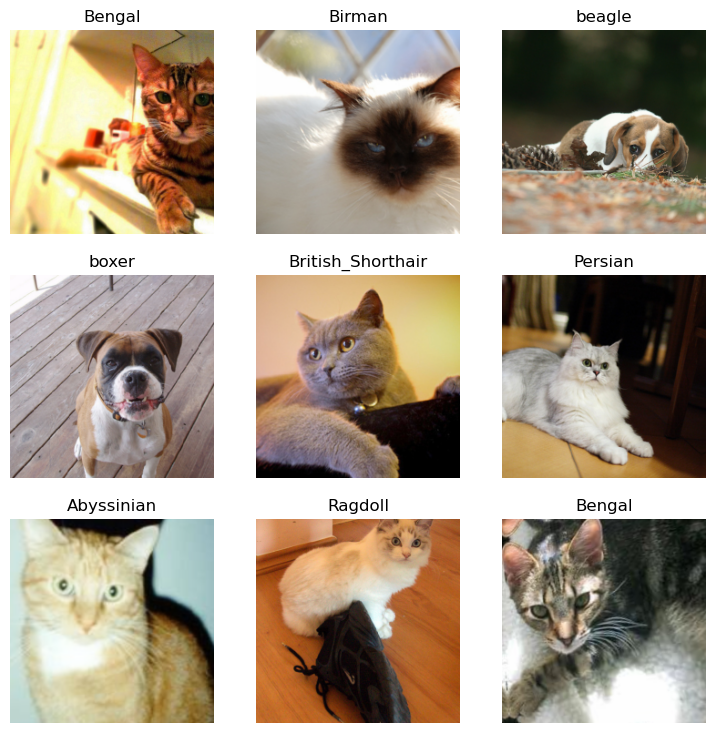

In [3]:
dls.show_batch(max_n=9)

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.555528,0.405173,0.134641,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.576513,0.301648,0.094723,01:15


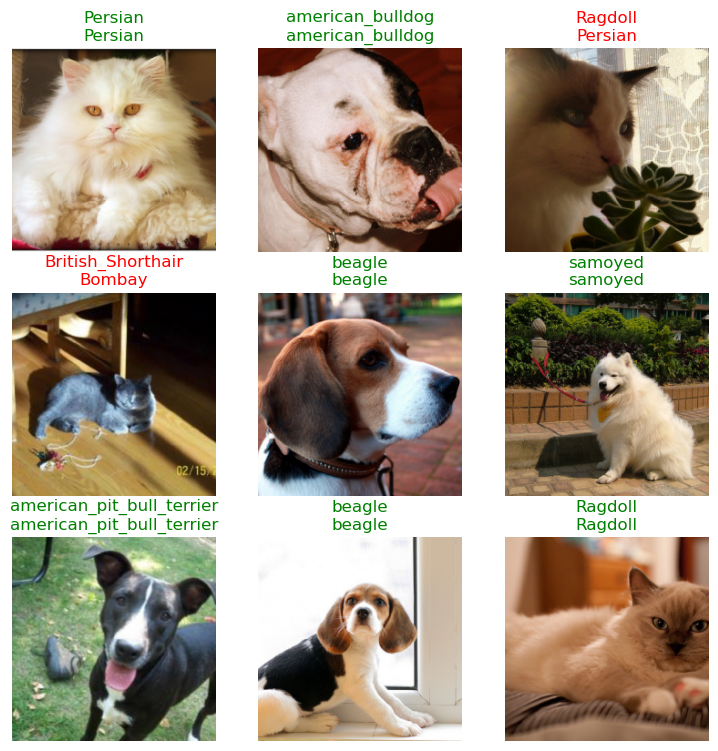

In [6]:
learn.show_results()